In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline

In [15]:
X,y =make_blobs(n_samples=1000, centers=3, n_features=2)

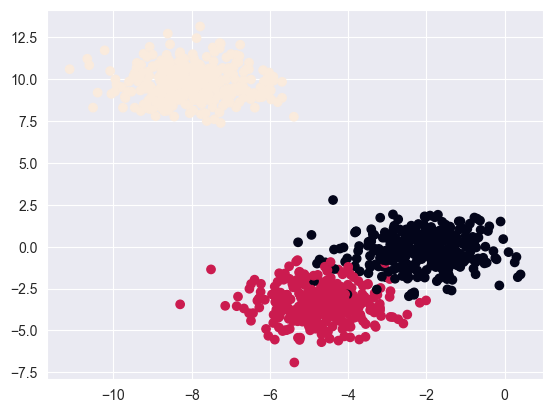

In [17]:
plt.scatter(X[:,0], X[:,1], c=y)

In [18]:
# Standardization feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [21]:
from sklearn.cluster import KMeans

# Elbow method to select K value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

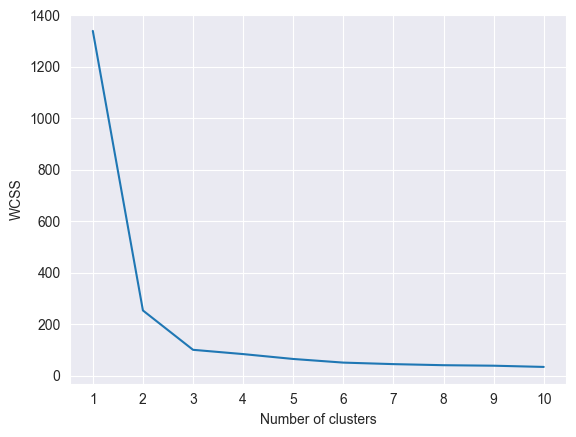

In [22]:
# plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
kmeans=KMeans(n_clusters=3, init="k-means++")
kmeans.fit_predict(X_train_scaled)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 2, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1,
       0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1,
       1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1,
       1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2,
       0, 0, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 2, 0,
       1, 1, 2, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0,
       1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2,

In [24]:
y_pred=kmeans.fit_predict(X_test_scaled)

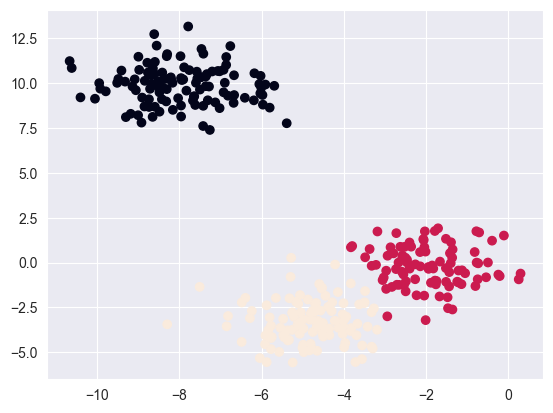

In [25]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred)

# Validating the k value
1. kneelocator
2. silhoutee scoring

In [26]:
# Kneelocator
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction="decreasing")

In [27]:
kl.elbow

np.int64(3)

In [29]:
# Silhouette score
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

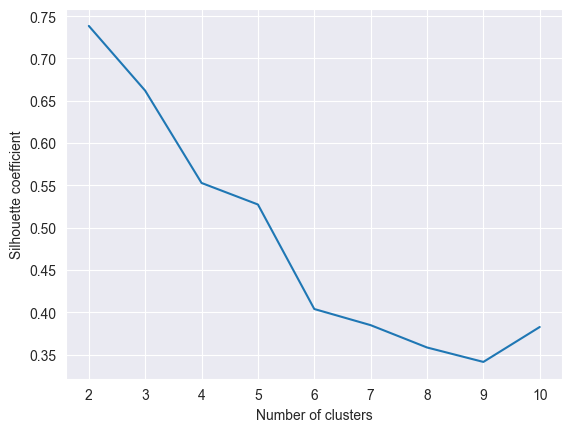

In [30]:
# plot silhouette score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()